# Bandits and gridworlds

Franz Wurm


This is the code for the practical session in the course "2223-S2 Reinforcement Learning & Decision-Making: Computational & Neural Mechanisms" [(link to Brightspace)](https://brightspace.universiteitleiden.nl/d2l/home/215293)

**Useful references**
- Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press.

## 1. General information

### 1.1 Goal of this practical

In this practical, you are going to implement a reinforcement learning algorithm for two standard problems.

In the [bandit problem](https://en.wikipedia.org/wiki/Multi-armed_bandit), the agent is faced with a choice between two options. Named after slot machines in a casino, our two-armed version helps to demonstrate the the two core principles that allow the agent to achieve his goal of reward maximzation. 

Afterwards, we will also investigate reinforcement learning in a more realistic context. In the gridworld problem, the agent is again faced with choices between different options. However, in contrast to the bandit task, choices are sequential, feedback is scarce and the state space big. This poses a bigger problem for learning in the gridworld.


### 1.2 Setting up this notebook 

This notebook contains all necessary information for the first practical session.

I recommend to download the file and save it to a separate folder. Optimally, this folder is easily accessible (e.g. on your desktop) or implemented in a preexisting folder structure (e.g. MyMaster>RLDM>PracticalRL).

I also recommend to work with copies. That means, you should not work on the original file, but rather work on copies. This makes sure, that you do not delete important information and always have a basis to go back to. Additionaly, you could implement version control, meaning you save your work to a new file from time to time (e.g., filename_v1, filename_v2). This makes sure you dont lose too much progress in case your computer shuts down or you forgot to press the save button.

The exercise is constructed to be completed chronologically, i.e. from top to bottom. There will be blocks with text, such as the text that you are currently reading, as well as blocks of code, where you can execute commands and computations.

The whole tutorial is written in R.

For working on the excersises of the practical I suggest you use [Google Colab](https://colab.research.google.com/) or [Jupyter-notebook](https://jupyter.org/). While Google Colab is straight foward to use, Jupyter-notebook might require you to install additional software (e.g., [Anaconda](https://anaconda.org/))

## 2. k-armed bandit task

As discussed in the lecture, the [bandit problem](https://en.wikipedia.org/wiki/Multi-armed_bandit) is a common test bed for both human and AI research. In a bandit task, the agent is faced with a choice between multiple options. Named after slot machines in a casino, the bandit task will help to demonstrate the two core principles that allow the agent to achieve his goal of reward maximzation.

The first thing we will do is to create a _function_ that generates samples from playing such a bandit. 

The function below samples reward drawn from a uniform distribution based on prespecified reward probabilities. As you can see, the function takes input parameters that dictate the number of trials to sample (<code>n_trials</code>) and the reward probablities (<code>probs</code>). 

The function returns and array with reward samples (<code>reward_samples</code>) and the reward probabilities (<code>reward_probs</code>) that generated it. Please note, that specifying more than one reward probabilities (e.g., <code>[0.1, 0,9]</code>) will sample two independent bandits and return them as a matrix.

In [1]:
generate_binomial_bandit = function(ntrl,probs){
    x = sapply(probs,function(p) rbinom(ntrl,1,p))
    #p = t(matrix(1,length(probs),ntrl)*probs) #probabilites for samples, might be handy later              
    return(x)
}

<div class="alert alert-warning" role="alert">
<h2> TODO </h2><br>

Put the function to use and check out what it does, using the <code>print</code> and/or <code>plot</code> command.
    
>HINT: 
</div>

In [ ]:
#checkout what the function does
nTrial = 10 #number of trials
probs = c(1,0,0.5) #reward probabilities for independent bandits
r = generate_binomial_bandit(nTrial,probs)
print(r)

As discussed in the lecture, the two principles of reinforcement learning are
- the learning rule: updating of expectations based on observations 
- the decision rule: taking actions based on expectations


## 3. Learning rule 

The learning rule should help our agent to build up expectations about its environment.

In this section, we are going to solve a very simple problem (calculating the mean) using a reinforcement learning algorithms. Afterwards, we will investigate how we can improve this algorithm to be more flexible (e.g., in changing environments)

### 3.1 Calculating the average in a stable environment

This example is based on Sutton & Barto (2018), Chapter 2.2 Multi-armed bandits (p.27f). For simplicity, I have omitted the iportance of action. Instead of a control problem, we will first consider only the prediction problem.

Calculating the average reward $\hat R _{N}$ is a very straightforward task usually expressed in the simple formula 

$\hat R _{N} = \frac{1}{N} \sum \limits_{i=1} ^{N}R _{i} $.
>where $\hat R$ is the average reward,<br>
>and $R $ is a vector with $N $ observed rewards.<br>

However, this method has a few drawbacks. Importantly, it can not consider new data without recalculating the whole sum. Additionally, with increasing N the working memory load increases as you need to store a record for every number.

Fortunately, this is not necessary using an reinforcement learning implementation.

We can reformulate our expectation about an upcoming reward

$ Q _{N+1} = \frac{1}{N} \sum \limits_{i=1} ^{N}R _{i} = Q _{N} + \frac{1}{N} [R _{N} - Q _{N}]$.
>where $Q$ is the estimated average value,<br>
>and $N$ is the number of past observations.<br>

You can clearly see the notion of a prediction error: reward minus expected reward in square brackets.

Let's try to implement this algorithm in a stable environement, as defined above.


In [ ]:
nTrial = 1000 #number of trials
probs = c(0.7) #reward probabilities for independent bandits
r = generate_binomial_bandit(nTrial,probs)

Q = 0 #initialize with zero expectation
for (iT in 1:nTrial) {
    Q = Q + (1/iT)*(r[iT]-Q)
}
print(Q)

### 3.2 New bandit and visualization
We can also define a new type of bandit where we sample from a normal distribution with mean mu and deviation sigma. In contrast to the previous bandit, the current bandit will draw its reward from a normal distribution. So we will not specify reward probabilities (<code>probs</code>) but rather reward means (<code>mu</code>) and respective standard deviations (<code>sigma</code>) as the second and third argument.

In [2]:
generate_normal_bandit = function(ntrl,mu,sigma){
    x = t(matrix(rnorm(ntrl*length(mu),mu,sigma),length(mu),ntrl))
    return(x)
}

In [ ]:
#checkout what the function does
nTrial = 1000 #number of trials
mu = c(1,1.5,2) #reward probabilities for independent bandits
sigma = c(0.1, 0.5, 0.2)
r = generate_normal_bandit(nTrial,mu,sigma)
#print(r)

In [ ]:
b = floor(min(r))
c = ceiling(max(r))
#print(b)
#print(c)

ax = pretty(b:c,100)
#print(ax)

c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")
c2 <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")
c3 <- rgb(100,255,100, max = 255, alpha = 80, names = "lt.green")


hgA = hist(r[,1],breaks = ax, plot = FALSE)
hgB = hist(r[,2],breaks = ax, plot = FALSE)
hgC = hist(r[,3],breaks = ax, plot = FALSE)

plot(hgA, col = c1)
plot(hgB, col = c2, add = TRUE)
plot(hgC, col = c3, add = TRUE)


Let's try the same for this bandit. 

Using the same averaging method from aboce, we should find again, that the estimated mean <code>Q</code> approaches the true mean <code>mu</code>.

In [ ]:
nTrial = 1000 #number of trials
mu = c(0.5) #reward probabilities for independent bandits
sd = c(0.1)
r = generate_normal_bandit(nTrial,mu,sd)

Q = 0 #initialize with zero expectation
for (iT in 1:nTrial) {
    Q = Q + (1/iT)*(r[iT]-Q)
}
cat('True mean: ')
print(mu)
cat('Estimated mean: ')
print(Q)

Now let's try to visualize how the estimated value approaches the true value.

In [ ]:
Q = matrix(,nTrial+1,1)
Q[1,1]=0
for (iT in 1:nTrial) {
    Q[iT+1,1] = Q[iT,1] + (1/iT)*(r[iT]-Q[iT,1])
}
#print(Q)

In [ ]:
plot(NA, ylim = c(0, 1), xlim = c(1, nTrial+1), main = "Estimated mean",
     xlab = "Trial",
     ylab = "p(reward)") #better view over the lines

lines(1:(nTrial+1),Q, type = "l", lwd=1.5) #thickness set to be higher


### 3.3 Calculating the average in a changing environment

Now that we have seen that the average method of incremental learning does a good job in estimating the average on a step-by-step basis, we are going to extend this example to cover changing environments. 

In our new bandit task, the environment undergoes sudden changes in reward probabilities. For simplicity, lets get back to our bandit with a binomial reward distribution.

In [ ]:
nTrial = 100 #number of trials
probs = c(1,0,1,0,1,0) #reward probabilities for independent bandits
r = generate_binomial_bandit(nTrial,probs)
#print(r)
#print(as.vector(r))


nT = (nTrial*length(probs))
Q = matrix(,nT+1,1)
rflat = as.vector(r)
ptrue = t(matrix(1,length(probs),nTrial)*probs) #probabilites for samples, might be handy later 
pflat = as.vector(ptrue)


Q[1,1]=0.5
for (iT in 1:nT) {
    Q[iT+1,1] = Q[iT,1] + (1/iT)*(r[iT]-Q[iT,1])
}


#print(Q)
plot(NA, ylim = c(0, 1), xlim = c(1, nT+1), main = "Estimated mean",
     xlab = "Trial",
     ylab = "p(reward)") #better view over the lines

lines(1:(nT+1),Q, type = "l", col = 'red',lwd=2) #thickness set to be higher
lines(1:(nT),pflat, type = "l", col = 'black',lwd=2) #thickness set to be higher

What is going on here? Instead of following the true mean, the estimated mean is slowly approaching 0.5.

While this seems to be odd, it is exactly what we told our algorithms to do: calculate the average over all oberservations. Alternating between 0 and 1, finally leads to an average of 0.5 But how do we fix this issue?

The solution lies in the scaling parameter, with which scale our update using the prediction error -  the so called learning rate $ \alpha $. So far, we have implemented a learning rate that scales with the number of trials, so that with more and more trials, new data gets less and and less impact on the overall average. However, in a changing environment we want exactly that new information actually does have an impact on our estimation.

Introducing a fixed learning rate solves this problem. Mathematically, a fixed learning rate balances the importance of old and new information, effectively introducing a memory. Old information is forgotten (i.e., down-weighted) while new information is incorporated. The respective formula is 

$ Q _{N+1} = Q _{N+1} + \alpha [R _{N} - Q _{N}]$,

with learning rate $ \alpha $ between 0 and 1. Stressing the memory analogy, it is clear what the extreme values do. A learning rate of 0 means that the algorithm solely focussed on old information, i.e., no incorporating any new information. A learning rate of 1 means that the algorithm solely focussed on new information, i.e., discarding all previous information.

Let's try it out.

In [ ]:
alpha = 0.1
Q[1,1]=0.5
for (iT in 1:nT) {
    Q[iT+1,1] = Q[iT,1] + alpha*(r[iT]-Q[iT,1])
}


#print(Q)
plot(NA, ylim = c(0, 1), xlim = c(1, nT+1), main = "Estimated mean",
     xlab = "Trial",
     ylab = "p(reward)") #better view over the lines

lines(1:(nT+1),Q, type = "l", col = 'red',lwd=2) #thickness set to be higher
lines(1:(nT),pflat, type = "l", col = 'black',lwd=2) #thickness set to be higher

## 4. Decision rule

So far, we have only dealt with prediction problems. However, the most powerful application of reinforcement learning lies in solving control problems. 

The decision rule (or policy) defines the agent's way of behaving at a given time or state. This is and extension of the previous prediction problem, as we now also consider actions given each state. Put differently, the policy is a mapping between states and actions and it corresponds to what psychologists sometimes call a stimulus-response association.

### 4.1 Action selection methods for decision-making

In order to make decisions, we need to have options. Our bandit function are already perfectly suited for this type of problem. All we need now is a function that takes actions based on estimated outcomes.

During the lecture, we introduced a few different decision rules and of course the list in not exhaustive. Below you find the most commonly used methods:
- random method
- greedy method
- e-greedy method
- softmax method

Let's first implement the different methods for action selection.

In [5]:
action_random = function(values) {
    nOptions = length(values)
    action = sample(nOptions,1)
    return(action)
}

action_greedy = function(values) {
    actions = 1:length(values)
    p = matrix(1,1,length(values))
    maxactions = which(values == max(values))
    if (length(maxactions)==1) {
        action = maxactions
    } else { #special case if there are identical values
        action = sample(actions[maxactions],1)
    }
    return(action)
}

action_egreedy = function(values,epsilon) {
    x = runif(1)
    if (x<epsilon) {
        action = action_random(values)
    } else {
        action = action_greedy(values)
    }   
    return(action)
}



!!! challenge: implement epsilon greedy

### 4.2 The importance of exploration

Now that we have a decision-making algorithm, we can combine both learning and decision making and then simulate our first reinforcement learning algorithm.

But let's make a few assumptions for our simulation first.

In [3]:
nAgents = 100
nTrials = 1000
nOptions = 10

#### 4.2.1 Greedy agents

In the following code block I have set up a number of greedy agents.

We will save both the average for the rewards (<code>rewards_greedy</code>) and the percentage of optimal decisions (<code>optimum_greedy</code>) will be saved for plotting.

Please note, that we implement the _average methode_ as the learning rule. As this is a stable environment, the properties of the average method guarantee that our estimates converge to the optimum/true value (at least with an appropriate action selection method...).

In [22]:
rewards_greedy = matrix(,nTrials,nAgents)
optimum_greedy = matrix(,nTrials,nAgents)

for (iA in 1:nAgents) {
    reward_means = rnorm(nOptions,0,1)
    optimal_action = which.max(reward_means)    
    #print(reward_means)
    #print(optimal_action)
    
    r = generate_normal_bandit(nTrials,reward_means,1)    
    #print(r)
    
    #initialize the estimated values for each bandit
    Q = matrix(0,nTrials+1,nOptions)
    actioncounter = matrix(0,1,nOptions)

     for (iT in 1:nTrials) {
        action = action_greedy(Q[iT,])
        actioncounter[1,action] = actioncounter[1,action]+1
        Q[iT+1,] =  Q[iT,] #important to forward past expectations
        Q[iT+1,action] = Q[iT,action] + (1/actioncounter[1,action])*(r[iT,action]-Q[iT,action])
        
        rewards_greedy[iT,iA] = r[iT,action]
        if (action == optimal_action) {
            optimum_greedy[iT,iA] = 1
        } else {
            optimum_greedy[iT,iA] = 0
        }            
    }
    #print(optimal_action)
    #print(actioncounter)
}


#### 4.2.2 $\epsilon$-greedy action selection

Basically, the $\epsilon$-greedy agent is identical to the greedy agent with the the minor detail that on 100*$\epsilon$% of the trials a random action will be chosen.

You find the code for $\epsilon$-greedy actions selection already above.

In [23]:
epsilon = 0.1

rewards_egreedy = matrix(,nTrials,nAgents)
optimum_egreedy = matrix(,nTrials,nAgents)

for (iA in 1:nAgents) {
    reward_means = rnorm(nOptions,0,1)
    optimal_action = which.max(reward_means)    
    #print(reward_means)
    #print(optimal_action)
    
    r = generate_normal_bandit(nTrials,reward_means,1)    
    #print(r)
    
    #initialize the estimated values for each bandit
    Q = matrix(0,nTrials+1,nOptions)
    actioncounter = matrix(0,1,nOptions)

     for (iT in 1:nTrials) {
        action = action_egreedy(Q[iT,],epsilon)
        actioncounter[1,action] = actioncounter[1,action]+1
        Q[iT+1,] =  Q[iT,] 
        Q[iT+1,action] = Q[iT,action] + (1/actioncounter[1,action])*(r[iT,action]-Q[iT,action])
        
        rewards_egreedy[iT,iA] = r[iT,action]
        if (action == optimal_action) {
            optimum_egreedy[iT,iA] = 1
        } else {
            optimum_egreedy[iT,iA] = 0
        }            
    }   
    #print(optimal_action)
    #print(actioncounter)
}


Now we can plot the performance for each action selection method.

### 4.2.3 Comparison (via plotting)

First, we plot the collected reward, based on the average over all agents.

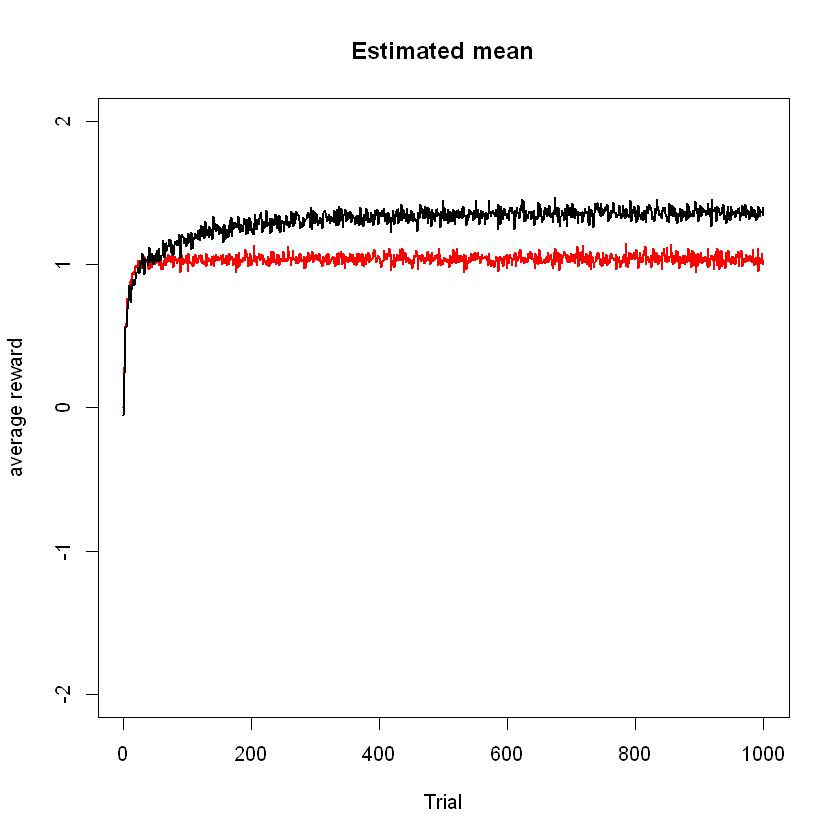

In [24]:
plot(NA, ylim = c(-2, 2), xlim = c(1, nTrials), main = "Estimated mean",
     xlab = "Trial",
     ylab = "average reward") #better view over the lines

lines(1:nTrials,rowMeans(rewards_greedy), type = "l", col = 'red',lwd=2) #thickness set to be higher
lines(1:nTrials,rowMeans(rewards_egreedy), type = "l", col = 'black',lwd=2) #thickness set to be higher

Next we can also plot the perentage of optimal choice, based on the average over all agents.

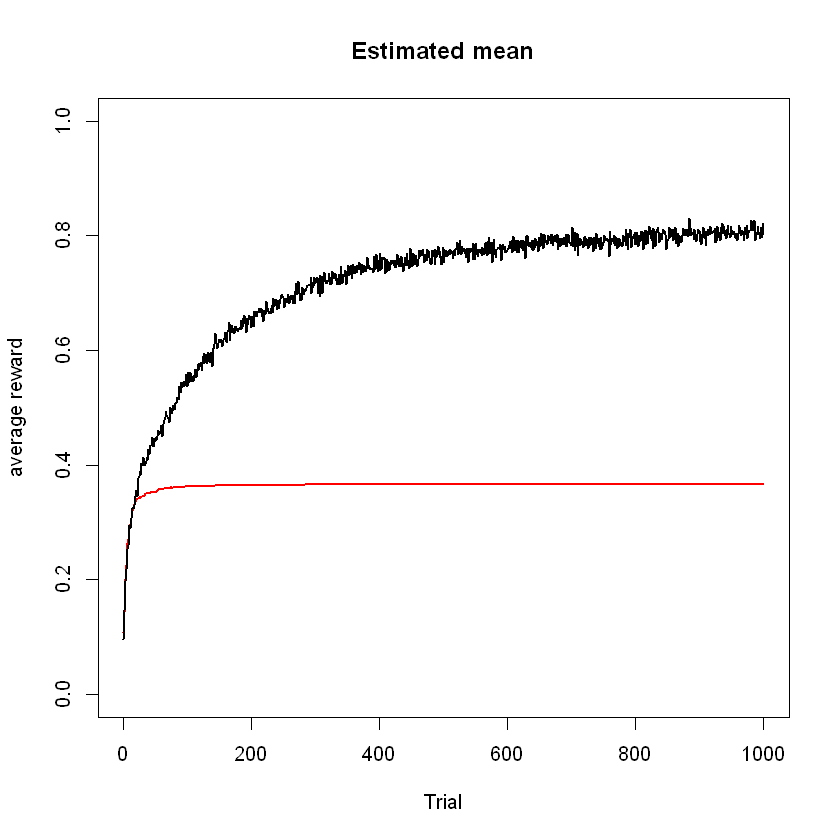

In [26]:
plot(NA, ylim = c(0, 1), xlim = c(1, nTrials), main = "Estimated mean",
     xlab = "Trial",
     ylab = "average reward") #better view over the lines

lines(1:nTrials,rowMeans(optimum_greedy), type = "l", col = 'red',lwd=2) #thickness set to be higher
lines(1:nTrials,rowMeans(optimum_egreedy), type = "l", col = 'black',lwd=2) #thickness set to be higher

### Softmax action selection

Of course, those 3 methods are not the only action selectino methods. Let's have a closer look the softmax rule, as this is maybe the most widely used decision rule in the neuroscientific literature.

$\LARGE p(a)= \frac{e ^{(\beta * Q(a))}} {\sum \limits _{a'} e ^{(\beta * Q(a'))}}$ 

In [28]:
softmax = function(Q,beta) {
  p = exp(beta * Q) / sum(exp(beta * Q))
  return(p)
}

Compared to the previous action selection method, the softmax method works a bit different. We do not immediately make an action, but rather transfer action values into action probabilities first.

Putting this softmax function to use, we need to make a few hypothetical assumptions for our bandit task.

For example, let's assume our agent has played the slot machine twice, each arm one time. The left arm lead to a reward (1), whereas the right arm did not result in a reward (0). We can translate this experience into simplified expectations for the next game.

In [30]:
Qdummy = c(1,0)
beta = 1

p = softmax(Qdummy,beta)

cat('beta: ')
print(beta)
cat('Expectations: ')
print(Qdummy)
cat('Probabilities: ')
print(p)

beta: [1] 1
Expectations: [1] 1 0
Probabilities: [1] 0.7310586 0.2689414


We can see, that the dummy expectations translate into action probabilites in a straightforward way. The highest value has the highest action probability.

**Question**: So what is the role of beta in this softmax function?

You can write your answers below and discuss it with your colleagues.

In [ ]:
# what is the role of beta in the softmax function?
# (you can change this code block to markdown)






Once you have answered the above question, you can play around with the beta value and observe the changes!

You will see, that beta (or 'inverse temperature') affects the so-called [gain](https://en.wikipedia.org/wiki/Gain_(electronics)). The higher the gain, the more pronounced the differences in action values get translated into action probabilities.

We can plot this in a systematic way.
Try to understand what is plotted on the x and y axis, and how the different betas relate.

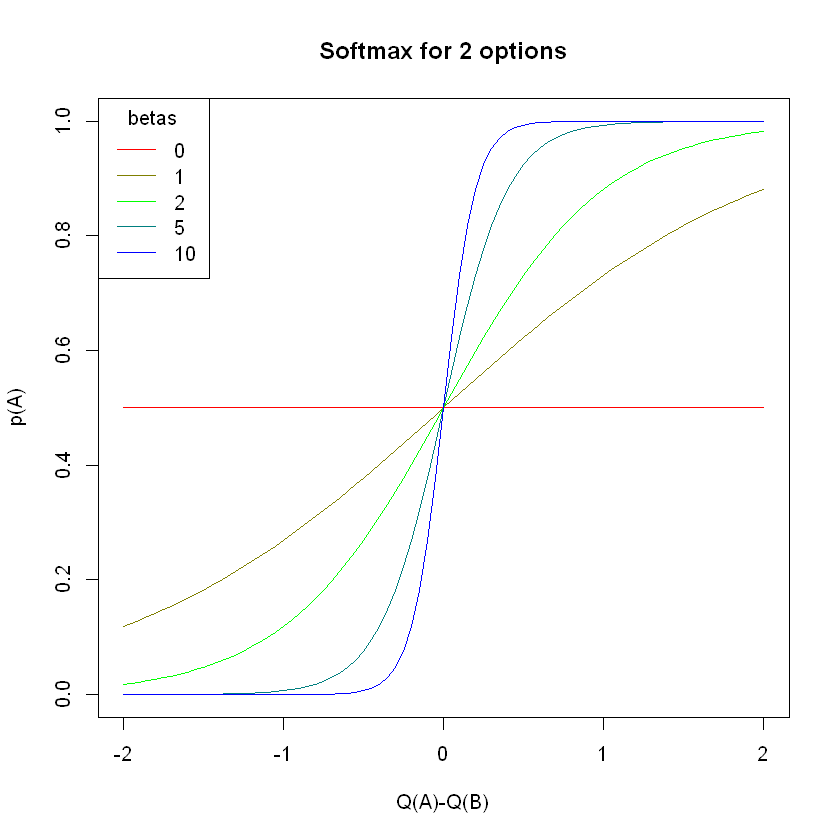

In [31]:
plot(NA, ylim = c(0, 1), xlim = c(-2, 2), main = "Softmax for 2 options",
     xlab = "Q(A)-Q(B)",
     ylab = "p(A)") #better view over the lines
x = seq(-2,2,0.05)
betas = c(0,1,2,5,10)
mypal <- colorRampPalette( c( "red", "green", "blue") )( length(betas) )
for (i in 1:length(betas)) {
  y = integer(length(x))
  for (j in 1:length(x)){
    p = softmax(Qdummy*x[j],betas[i])
    y[j] = p[1]
  }
  lines(x,y, type = "l", col = mypal[i], , lwd=1.5) #thickness set to be higher
}
legend("topleft", legend=as.character(betas), lwd = 1,col=mypal,title='betas')

In the next step, we can finally put the softmax into action.

Before we can make a decision, we need to define the action function for the softmax method.


In [76]:
action_softmax = function(values,beta) {
    actions = length(values)
    p = softmax(values,beta)
    action = sample(actions,size = 1, prob = p)
    return(action)
}

Afterwards, we can use the method and compare it to greedy action selection in our stable environment with normally distributed rewards.

<div class="alert alert-warning" role="alert">
<h2> Softmax and greedy action selection </h2><br>

Based on the schematic figure for different betas and the simulation above, how does greedy, random and softmax action selection relate?
    
>Task: Can you get the softmax method to show the same results as greedy or random action selection?
</div>

In [87]:
beta = 0.8

rewards_softm = matrix(,nTrials,nAgents)
optimum_softm = matrix(,nTrials,nAgents)

for (iA in 1:nAgents) {
    reward_means = rnorm(nOptions,0,1)
    optimal_action = which.max(reward_means)    
    #print(reward_means)
    #print(optimal_action)
    
    r = generate_normal_bandit(nTrials,reward_means,1)    
    #print(r)
    
    #initialize the estimated values for each bandit
    Q = matrix(0,nTrials+1,nOptions)
    actioncounter = matrix(0,1,nOptions)

     for (iT in 1:nTrials) {
        action = action_softmax(Q[iT,],beta)
        actioncounter[1,action] = actioncounter[1,action]+1
        Q[iT+1,] =  Q[iT,] 
        Q[iT+1,action] = Q[iT,action] + (1/actioncounter[1,action])*(r[iT,action]-Q[iT,action])
        
        rewards_softm[iT,iA] = r[iT,action]
        if (action == optimal_action) {
            optimum_softm[iT,iA] = 1
        } else {
            optimum_softm[iT,iA] = 0
        }            
    }   
    #print(optimal_action)
    #print(actioncounter)
}

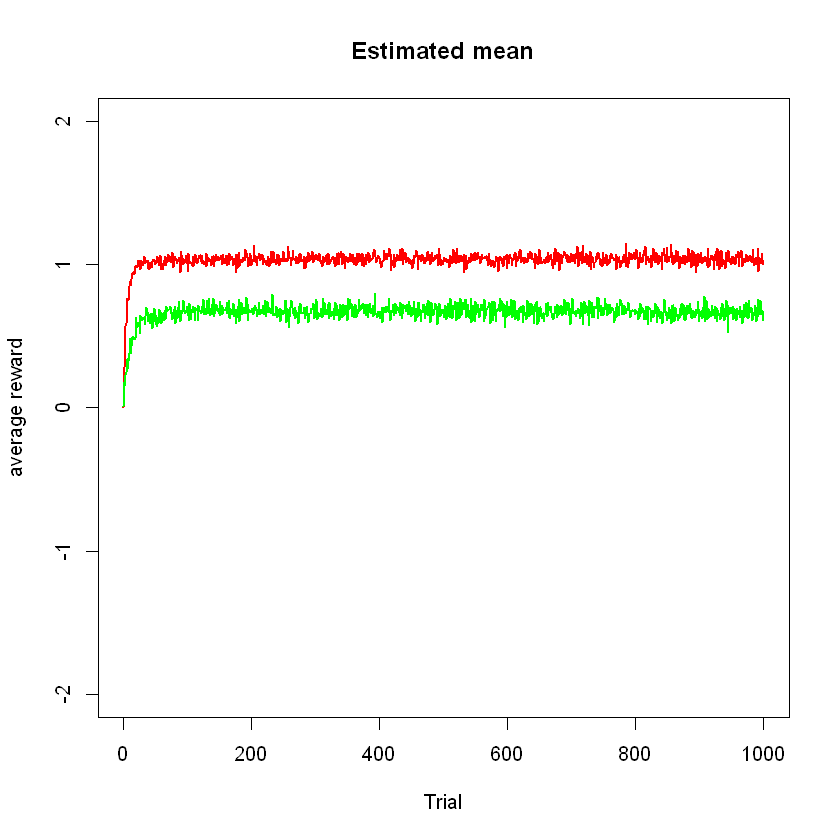

In [89]:
plot(NA, ylim = c(-2, 2), xlim = c(1, nTrials), main = "Estimated mean",
     xlab = "Trial",
     ylab = "average reward") #better view over the lines

lines(1:nTrials,rowMeans(rewards_greedy), type = "l", col = 'red',lwd=2) #thickness set to be higher
lines(1:nTrials,rowMeans(rewards_softm), type = "l", col = 'green',lwd=2) #thickness set to be higher

In [ ]:
rm(list = ls()) #clear the workspace before we continue

### The grid world problem

<div class="alert alert-warning" role="alert">
<h2> Additional material </h2><br>

This is additional and optional material.
    
</div>

*Grid worlds* are simplified respresentations of the environment, that are often used for navigation simulation. As is implied by the name, grid worlds break down the environment into a grid, similar to a chess board. For the scope of this course we are going to stick with a very basic 4x4 gridworld.

Before we dive further into the code, a bit more background information on gridworlds. 

Gridworlds are so-called [Markov Decision Processes](https://en.wikipedia.org/wiki/Markov_decision_process). In contrast to the previous bandit task, gridworlds usually are multi-step problems, meaning that actions executed in one state cannot only result in reward, but also affect the upcoming state. This necessitates the agent to not only consider the immediate reward but also the expected cumulative reward. 

Our agent always starts in the same start state (s_0, top left of board). From there, it will take *steps*, that gradually move him across the board. Movement is restricted to the cardinal directions (up, down, right, left). Reward is located in the terminal state (s_terminal, bottom right of board). Upon arrival at the site of reward, the agent receives the reward (associated with a positive value) and will be returned to the initial state, so the whole procedure can start again. The (time)steps between start and terminal state are regarded as a *run* (or *episode*). Start state, reward and terminal state do NOT change between runs. Thus, our gridworld environment is stable.

For this grid world example, we will implement the Q learning rule, which is defined as

$\LARGE Q_{new}(s,a) = Q_{old}(s,a) + \alpha * (R + \gamma max_{a} Q_{old}(s',a) - Q_{old}(s,a))$,

    where $\alpha$ is the learning rate,
    $\gamma$ is the discounting factor,
    and s' is the next state

Below, we define the most basic details for our gridworld.

In [ ]:
# copied function from bandit
takeAction = function(values,options) {
    if (length(values) == length(options)) {
        p = softmax(values,beta)
        action = sample(options, size = 1, prob = p)
    } else {### The grid world problem

# copied function from bandit
softmax = function(Q,beta) {
  p = exp(beta * Q) / sum(exp(beta * Q))
  return(p)
}


In [ ]:
grid_size = 4

s_0 <- 0 # start at initial state
s_terminal <- (grid_size^2)-1 # goal state
actions <- c("left", "up", "right", "down")

# assign numbers to each state in the gridworld
states = matrix(, nrow = grid_size, ncol = grid_size)
iZ = 0
for (iX in 1:grid_size) {
  for (iY in 1:grid_size) {
    states[iY, iX] = iZ
    iZ = iZ + 1
  }
}

print(paste("state state: ",s_0))
print(paste("final state: ",s_terminal))
print(states)

In [ ]:
getReward_grid <- function(state) {
  if (state == s_terminal) {
    reward <- 100
  } else {
    reward <- -1
  }
  return(reward)
}

makeMove <- function(sin, ain) {
  sout = sin 
  coords = which(states == sin, arr.ind = TRUE)  
  if (ain == "down")
    coords[1] <- coords[1] + 1
  if (ain == "up")
    coords[1] <- coords[1] - 1
  if (ain == "right")
    coords[2] <- coords[2] + 1
  if (ain == "left")
    coords[2] <- coords[2] - 1
  
  if (coords[1] < 1)
    coords[1] = 1
  if (coords[1] > length(states[, 1]))
    coords[1] = length(states[, 1])
  if (coords[2] < 1)
    coords[2] = 1
  if (coords[2] > length(states[1, ]))
    coords[2] = length(states[1, ])
  
  sout = states[coords]  
  return(sout)
}

TDlearn_grid = function(values,reward,action,state,nextstate) {
    values[state,action] = values[state,action] + alpha * (reward + max(values[nextstate,]) - values[state,action])
    return(values)
}

Now that we have defined the most crucial parts for our grid world, we can put everything together.

For convenience, I have already added multiple agents, as this will allow us to draw more precise conclusions from the simulation data.

For the agent's parameters I have implemented very basic values. You can have a look how changing those parameters affects the performance in the grid world.

In [ ]:
nAgent = 20
nRun = 100

alpha = 0.1
beta = 1

movecounter = matrix(0, nrow = nRun, ncol = nAgent)
Qall = array(0,c(grid_size^2, length(actions), nAgent))

for (iAgent in 1:nAgent) {
    
#     print(paste("agent ",iAgent))
    Q <- array(0, c(grid_size^2, length(actions)))

    for (iRun in 1:nRun) {
    
#         if (iRun %% 20 == 0) {
#           print(paste("   trial ",iRun))
#         }
    
        state <- s_0 # set cursor to initial state
        sidx = which(states == state)
    
        moves = 0   
        while (state != s_terminal) {
        
            action = takeAction(Q[sidx,],actions)
            next_state <- makeMove(state, action)
            reward <- getReward_grid(next_state)
        
            aidx = which(actions == action)
            s2idx = which(states == next_state)
            Q = TDlearn_grid(Q,reward,aidx,sidx,s2idx)
        
            response <- (list(state = next_state, reward = reward))

      
#             if ((iRun == 1) & (next_state == s_terminal))	{
#                print(paste("trial ",iRun))
#                print(Q) # what does q-look like after first successful iteration (i==1)
#             }
#             if ((iRun == nRun) & (next_state == s_terminal))	{
#                print(paste("trial ",iRun))
#                print(Q) # what does q-look like after first successful iteration (i==1)
#             }
          
            state <- response$state # move to next state
            sidx = which(states == state)
      
            moves = moves + 1
        }
        Qall[,,iAgent] = Q
        movecounter[iRun, iAgent] = moves
    }
}
#print(movecounter)

In order to better understand the agents' behavior in the gridworld we can again make use of the `print()` and `plot()` function.

**Question**: As a first step, lets have a look at the performance of our agent. Do you have any hypothesis about this?

In [ ]:
# what is your hypothesis?
# (you can change this code block to markdown)






**Answer**: Performance for learning agents should improve over time. Therefore we should expect to find improvements in performance for our grid world agent. Performance can be measured in multiple different ways. For our grid world example, we could define 2 measures of preformance. The first measure is already plotted below: the number of steps it takes the agents to get from start state to terminal state. While the agent is aimlessly roaming the gridworld in the beginning, it quickly picks up the optimal path to the goal.

**Excercise 2** Define a second measure of performance, implement it in the code and plot it.

In [ ]:
# plotting performance
plot(1:nRun, apply(movecounter, c(1), mean), xlab = "Runs", ylab = "Steps", main="Performance",)

Finally, we can also have a look at the policy of our agents.

Plotting the policy

In [ ]:
actions2plot <- c("left ", " up  ", "right", "down ")


a = apply(Qall, c(1,2), mean)
b = apply(a, c(1), which.max)
dim(b) = c(grid_size,grid_size)

#print(a)

print("policy for recent agent")
for (i in 1:grid_size) {
  cat('|')
  for (j in 1:grid_size) {
    if (states[i,j]==s_0) {
      cat(paste('*',actions2plot[b[i,j]],'*|'))
    } else if (states[i,j]==s_terminal) {
      cat(paste('+',actions2plot[b[i,j]],'+|'))
    } else {
      cat(paste(' ',actions2plot[b[i,j]],' |'))
    }
  }
  print('')
}

**Excercise 3.** So far, we have only investigated the softmax and random method for our gridworld, with random action selection being a special case of softmax action selection. Try to implement alternative methods, such as greedy or e-greedy and have a look how performance changes. 

**Excercise 4.** The current grid world is perfectly deterministic. Actions reliably lead to the same outcome. Reward is always hidden in the same location. Recall that for our bandit example reward delivery was probabilistic. Can you implement some randomness in the grid world as well? Think about a few possible options. How could you implement those and what would be the consequences for agents' learning and decision-making?

**Excercise 5.** (optional) Although we have only discussed different decision rules at this point, we could also think about different learning rules. A prominent example is already described in Sutton & Barto (2018, p132). In their variant of the grid world, learning for the different learning rules translates into very distinct behavioral patterns. It nicely illustrates how small changes in the algorithm can have quite strong effects on decision making. Have a look at the example. Can you construct a cliff world and replicate the findings reported by Sutton & Barto?      